# SF Crime Addressed Around Standard Work Patterns

**Author:** Brad Allen

**Date:** February 18, 2016

In this paper, I explore collected crime patterns in San Francisco during the Summer of 2014. As I live in San Francisco, it was fun to get to explore what is happening in my city (and how to stay safe!). 

Theft/Larceny is *by far* the most reported crime in the city. After analyzing at reported crimes by day and month, contrary to expectation, I found that July had more crimes reported "midweek" than over the weekends. I peeled into the type of crimes being addressed and found that "Warrants" and "Non-Criminal" activities rise during the week - **during weekdays, the police are performing work that can be predicted in advance and managed.**

I then looked at different neighborhoods/police districts to see if any patterns might emerge. The city center (SoMA = Southern, Financial District = Central, Tenderloin, etc) is where the highest crime emerges. Peculiarly, **weekday crimes have a bump around 12pm and then again between 5-7pm. Presumably, this is when victims realize that a theft has occurred and contact the police.** No such pattern is present on the weekends. 

In [3]:
setwd("~/Desktop")
crime_data <- read.csv("sf2014data.csv")

#install.packages('dplyr')
library(dplyr)
library(ggplot2)
library(repr)
options(repr.plot.width=4, repr.plot.height=3)

#First, make the necessary modifications to the dataset.
crime_data$Date <- as.Date(crime_data$Date, format = '%m/%d/%Y')
crime_data$Month <- format(as.Date(crime_data$Date), "%B")
crime_data$Time <- as.character(crime_data$Time)
crime_data$Hour <- substr(crime_data$Time, 1, 2)
crime_data$Hour <- as.factor(crime_data$Hour)
crime_data$Month <- factor(crime_data$Month, levels = c("June", "July", "August"))


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



# Exploratory Analysis

I began by plotting out the frequency in which crime occurred - by day throughout the summer, for each month, and by day of the week. In doing this, we did not learn very much information: reported crime slightly increased throughout the summer, and crime seemed to peak on weekends, which might be expected.

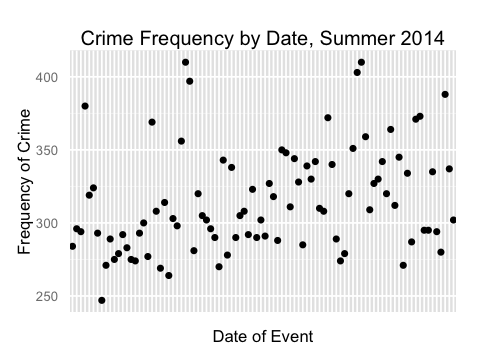

In [4]:
#Chart 1: Frequency of Event by Date
daily_trend <- data.frame(table(crime_data$Date))
colnames(daily_trend) <- c("Date", "Frequency")
daily_trend <- daily_trend[order(daily_trend$Date), ]
daily_chart <- ggplot(data = daily_trend, aes(x = Date, y = Frequency)) + geom_point()
daily_chart <- daily_chart + theme(text = element_text(size=10), axis.text.x = element_blank(), 
                                   axis.ticks = element_blank())
daily_chart <- daily_chart + xlab("Date of Event") + ylab("Frequency of Crime") + 
                                ggtitle("Crime Frequency by Date, Summer 2014")
daily_chart

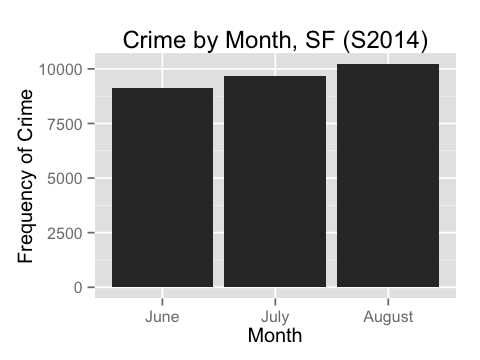

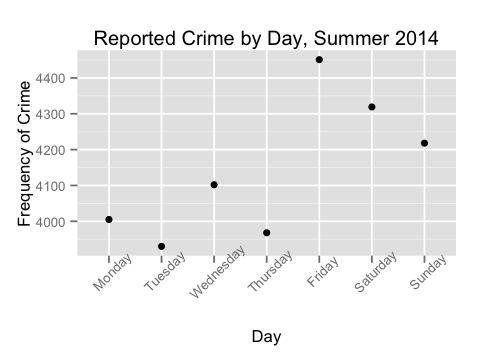

In [5]:
#Chart 2: Number of Occurances Each Month
month_chart <- ggplot(crime_data, aes(x = Month)) + geom_bar()
month_chart <- month_chart + xlab("Month") + ylab("Frequency of Crime") + 
            ggtitle("Crime by Month, SF (S2014)")
month_chart

#Chart 3: Frequency of Event by Day
weekday_trend <- data.frame(table(crime_data$DayOfWeek))
colnames(weekday_trend) <- c("Day", "Frequency")
weekday_trend$Day <- factor(weekday_trend$Day, levels = c("Monday", "Tuesday", "Wednesday", 
                                                          "Thursday", "Friday", "Saturday", "Sunday"))
weekday_trend <- weekday_trend[order(weekday_trend$Day), ]

weekday_chart <- ggplot(data = weekday_trend, aes(x = Day, y = Frequency)) + geom_point()
weekday_chart <- weekday_chart + xlab("Day") + ylab("Frequency of Crime") + 
                                            ggtitle("Reported Crime by Day, Summer 2014")
weekday_chart <- weekday_chart + theme(text = element_text(size=10), axis.text.x = element_text(angle=45))
weekday_chart

Combining the charts above revealed some interesting trends. Looking at crime by month, **there appear to be strong patterns by week in July and August, but not June. Even more curiously, July's crimes seem to occur during weekdays and August is on weekends.** 

I pulled out the Top 10 crimes by frequency and used that to do a pattern analysis of what is happening in July and August.

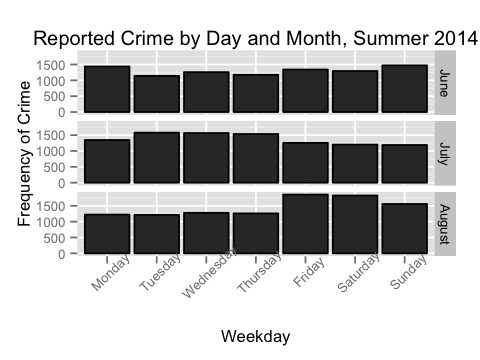

In [6]:
#Chart 4: Frequency of Event by Day & Month
day_mo <- crime_data %>% group_by(Month, DayOfWeek)
day_month <- summarise(day_mo, freq = n())
day_month$DayOfWeek <- factor(day_month$DayOfWeek, levels = c("Monday", "Tuesday", 
                                                              "Wednesday", "Thursday", "Friday", 
                                                              "Saturday", "Sunday"))
day_month <- day_month[order(day_month$Month, day_month$DayOfWeek), ]

daymonth_chart <- ggplot(data = day_month, aes(x = DayOfWeek, y = freq)) + facet_grid(Month ~ .)
daymonth_chart <- daymonth_chart + geom_bar(color="black", stat="identity")
daymonth_chart <- daymonth_chart + theme(text = element_text(size=10), axis.text.x = element_text(angle=45))
daymonth_chart <- daymonth_chart + xlab("Weekday") + ylab("Frequency of Crime") + 
                                            ggtitle("Reported Crime by Day and Month, Summer 2014")
daymonth_chart

In [7]:
#Table 5: TOP 10 CRIMES

top10 <- crime_data %>% group_by(Category) %>% summarise(freq = n())
top10 <- top10[order(-top10$freq),]
colnames(top10) <- c("Type of Crime", "Frequency")
top10[1:10, ]

,Type of Crime,Frequency
1,LARCENY/THEFT,9466
2,OTHER OFFENSES,3567
3,NON-CRIMINAL,3023
4,ASSAULT,2882
5,VEHICLE THEFT,1966
6,WARRANTS,1782
7,DRUG/NARCOTIC,1345
8,SUSPICIOUS OCC,1300
9,MISSING PERSON,1266
10,SECONDARY CODES,442


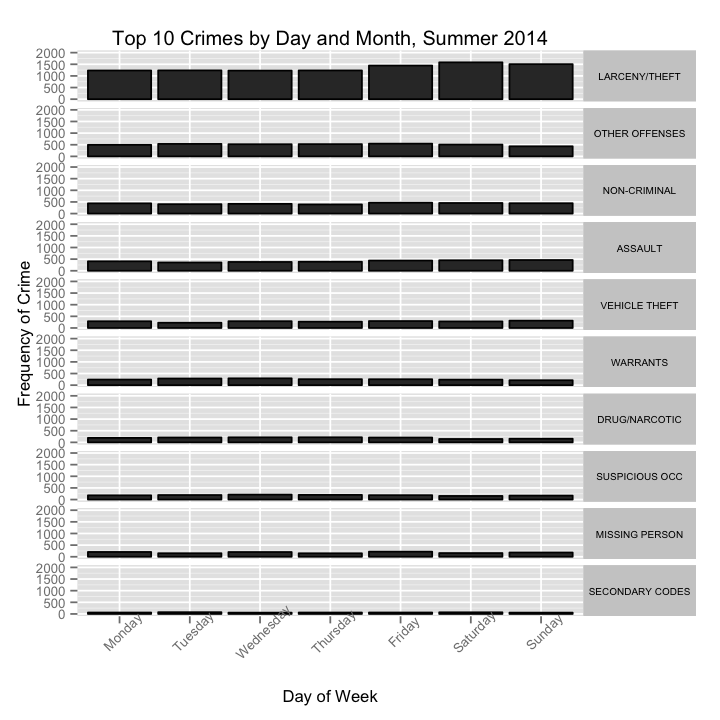

In [8]:
options(repr.plot.width=6, repr.plot.height=6)
top10vector <- top10[1:10, ]
colnames(top10vector) <- c("Category", "Frequency")
top10vector <- as.character(top10vector$Category)
top10vector <- as.factor(top10vector)
cw <- subset(crime_data, Category %in% top10vector) %>% group_by(Category, DayOfWeek)
crime_week <- summarise(cw, freq = n())
crime_week$DayOfWeek <- factor(crime_week$DayOfWeek, levels = c("Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"))
crime_week$Category <- factor(crime_week$Category, levels = c("LARCENY/THEFT", 'OTHER OFFENSES', 'NON-CRIMINAL', 'ASSAULT', 'VEHICLE THEFT', 'WARRANTS', 'DRUG/NARCOTIC', 'SUSPICIOUS OCC', 'MISSING PERSON', 'SECONDARY CODES'))
crime_week <- crime_week[order(crime_week$Category, crime_week$DayOfWeek), ]

crimeweek_chart <- ggplot(data = crime_week, aes(x = DayOfWeek, y = freq)) + facet_grid(Category ~ .)
crimeweek_chart <- crimeweek_chart + geom_bar(color="black", stat="identity") + ylim(0, 2000)
crimeweek_chart <- crimeweek_chart + theme(strip.text.y = element_text(size = 6, colour = "black", angle = 0))
crimeweek_chart <- crimeweek_chart + xlab("Day of Week") + ylab("Frequency of Crime") + 
                                            ggtitle("Top 10 Crimes by Day and Month, Summer 2014")
crimeweek_chart <- crimeweek_chart + theme(text = element_text(size=10), axis.text.x = element_text(angle=45))
crimeweek_chart

Looking at the **Top 10** crimes by day of week does not reveal any interesting patterns. Let's look below at how these crimes were reported in July and August. 

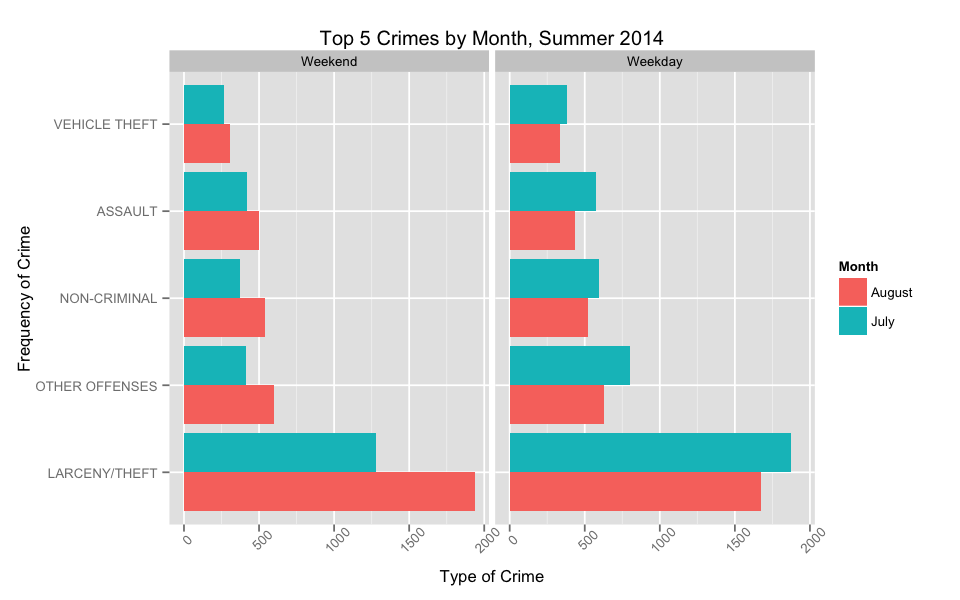

In [43]:
#CHART 5: CRIMES BY MONTH
#Summer Weekends
options(repr.plot.width=8, repr.plot.height=5)
top5vector <- top10[1:5, ]
colnames(top5vector) <- c("Category", "Frequency")
top5vector <- as.character(top5vector$Category)
top5vector <- as.factor(top5vector)

augwknd <- subset(crime_data, Category %in% top5vector) %>% 
            filter((Month == "August") & ((DayOfWeek == "Friday") | (DayOfWeek == "Saturday") | 
                                          (DayOfWeek == "Sunday"))) %>% group_by(Category)
aug_weekend <- summarise(augwknd, freq = n())
aug_weekend <- cbind(aug_weekend, "August")
colnames(aug_weekend) <- c("Category", "Frequency", "Month")

julwknd <- subset(crime_data, Category %in% top5vector) %>% 
            filter((Month == "July") & ((DayOfWeek == "Friday") | (DayOfWeek == "Saturday") | 
            (DayOfWeek == "Sunday"))) %>% group_by(Category)
jul_weekend <- summarise(julwknd, freq = n())
jul_weekend <- cbind(jul_weekend, "July")
colnames(jul_weekend) <- c("Category", "Frequency", "Month")

summer_weekend <- rbind(aug_weekend, jul_weekend)
summer_weekend <- cbind(summer_weekend, "Weekend") 
colnames(summer_weekend) <- c("Category", "Frequency", "Month", "Type")

#Summer Weekdays
aug_wkdy <- subset(crime_data, Category %in% top5vector) %>% 
            filter((Month == "August") & ((DayOfWeek == "Monday") | (DayOfWeek == "Tuesday")  
            | (DayOfWeek == "Wednesday")  | (DayOfWeek == "Thursday"))) %>% group_by(Category)
aug_weekday <- summarise(aug_wkdy, freq = n())
aug_weekday <- cbind(aug_weekday, "August")
colnames(aug_weekday) <- c("Category", "Frequency", "Month")

jul_wkdy <- subset(crime_data, Category %in% top5vector) %>% 
            filter((Month == "July") & ((DayOfWeek == "Monday") | (DayOfWeek == "Tuesday")  
            | (DayOfWeek == "Wednesday")  | (DayOfWeek == "Thursday"))) %>% group_by(Category)
jul_weekday <- summarise(jul_wkdy, freq = n())
jul_weekday <- cbind(jul_weekday, "July")
colnames(jul_weekday) <- c("Category", "Frequency", "Month")

summer_weekday <- rbind(aug_weekday, jul_weekday)
summer_weekday <- cbind(summer_weekday, "Weekday") 
colnames(summer_weekday) <- c("Category", "Frequency", "Month", "Type")

summer <- rbind(summer_weekend, summer_weekday)
summer$Category <- factor(summer$Category, 
                    levels = c("LARCENY/THEFT", 'OTHER OFFENSES','NON-CRIMINAL', 'ASSAULT', 'VEHICLE THEFT'))

summer_chart <- ggplot(data = summer, aes(x = Category, y = Frequency, fill = factor(Month))) + 
                           geom_bar(position="dodge", stat="identity") + coord_flip() +
                        facet_grid(. ~ Type)
summer_chart <- summer_chart + xlab("Frequency of Crime") + ylab("Type of Crime") + 
                                            ggtitle("Top 5 Crimes by Month, Summer 2014") +
                                            scale_fill_discrete("Month")
summer_chart <- summer_chart + theme(text = element_text(size=10), axis.text.x = element_text(angle=45))
summer_chart


Looking here, we can see that July's pattern of increased reporting during weekdays holds true across the board. **There are, on average, almost 50% higher reporting of theft on weekdays than weekends - a trend that is not true for the month of August.**

My conclusion is that **over the weekend, people are not in town to report crimes.** The elevated numbers are not due to the distribution of when the events occurred, but rather when they were reported. 

Let's now look at the Police Departments in San Francisco and where crimes are reported. The Top 4 (by volume of crime) are Central, Northern, Southern, and Mission. This would be expected, as they are in the city center and cover a relatively large volume of the city. The Tenderloin (#7) is known for not being safe, but is comparatively small.



<img src="files/showimage.jpg">

In [55]:
#Tough Neighborhoods
hardcrime <- crime_data %>% filter(Category == "LARCENY/THEFT" | Category == "ASSAULT") %>% group_by(PdDistrict)
hc_neighborhood <- summarise(hardcrime, freq = n())
hc_neighborhood <- hc_neighborhood[order(-hc_neighborhood$freq), ]
hc_neighborhood

,PdDistrict,freq
1,SOUTHERN,3090
2,CENTRAL,1851
3,NORTHERN,1796
4,MISSION,1130
5,BAYVIEW,840
6,INGLESIDE,840
7,TENDERLOIN,805
8,PARK,694
9,TARAVAL,694
10,RICHMOND,608


Finally, let's see how crimes are distributed by time of day, neighborhood, and weekend / weekday. **We notice that in Central, Northern, and Southern Districts (city centers) a "bump" at 12pm and again between 5-7pm. This corroborates the July/August assumption, which is that these statistics are not matching when the crime occurs, but rather when it is reported.**

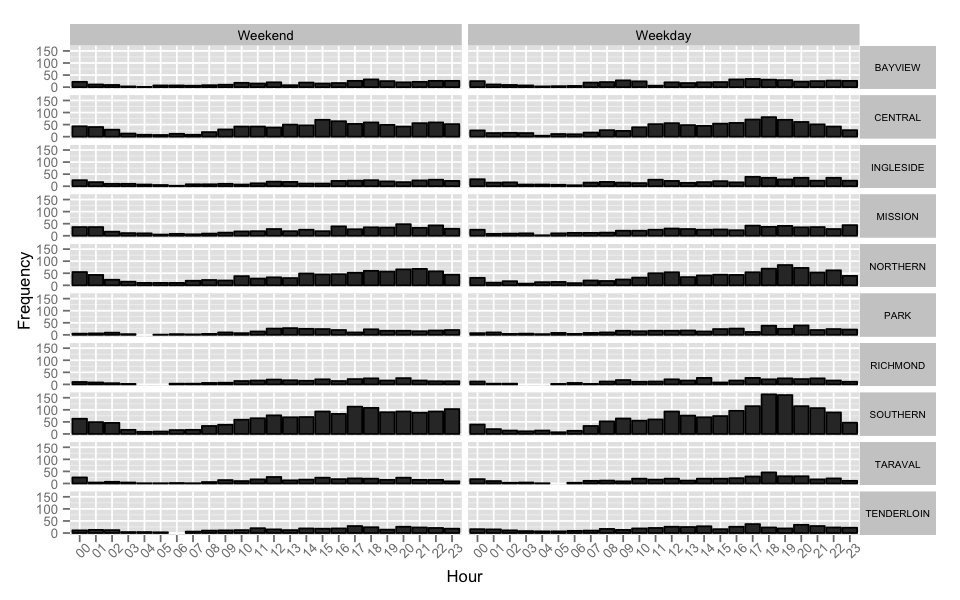

In [54]:
#Weekend Neighborhoood
wknd_hood <- crime_data %>% filter((Category == "LARCENY/THEFT" | Category == "ASSAULT") & ((DayOfWeek == "Friday") | (DayOfWeek == "Saturday") | (DayOfWeek == "Sunday"))) %>% group_by(PdDistrict, Hour)
weekend_neighborhood <- summarise(wknd_hood, freq = n())
weekend_neighborhood <- cbind(weekend_neighborhood, "Weekend")
colnames(weekend_neighborhood) <- c("District", "Hour", "Frequency", "Type")

#Weekday Neighborhoood
wkdy_hood <- crime_data %>% filter((Category == "LARCENY/THEFT" | Category == "ASSAULT") & ((DayOfWeek == "Monday") | (DayOfWeek == "Tuesday")  | (DayOfWeek == "Wednesday")  | (DayOfWeek == "Thursday"))) %>% group_by(PdDistrict, Hour)
weekday_neighborhood <- summarise(wkdy_hood, freq = n())
weekday_neighborhood <- cbind(weekday_neighborhood, "Weekday")
colnames(weekday_neighborhood) <- c("District", "Hour", "Frequency", "Type")

weekday <- rbind(weekend_neighborhood, weekday_neighborhood)

chart <- ggplot(data = weekday, aes(x = Hour, y = Frequency)) + facet_grid(District ~ Type)  
chart <- chart + geom_bar(color="black", stat="identity") 
chart <- chart + theme(strip.text.y = element_text(size = 6, colour = "black", angle = 0))
chart <- chart + theme(text = element_text(size=10), axis.text.x = element_text(angle=45))
chart